#Minería de datos - AstronomIA Pipe

Realizado por: Iván Tang Zhu

1. Preparación de Datos
2. División de los datos 70-30
3. Aprendizaje del Modelo y evaluación
4. Pipe con modelo entrenado
5. Guardar el modelo

In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [2]:
#Librerías para el Pipe
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder

# 1. Preparación de Datos


In [44]:
#Cargamos los datos
data = pd.read_excel("datos_preparados.xlsx")
data.head()

,Unnamed: 0,u,g,r,i,z,class,redshift
0,0,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,1,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,2,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,3,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,4,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


In [4]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80846 entries, 0 to 80845
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  80846 non-null  int64  
 1   u           80846 non-null  float64
 2   g           80846 non-null  float64
 3   r           80846 non-null  float64
 4   i           80846 non-null  float64
 5   z           80846 non-null  float64
 6   class       80846 non-null  object 
 7   redshift    80846 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.9+ MB


In [45]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [46]:
#Corrección de variables categóricas
data['class']=data['class'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80846 entries, 0 to 80845
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   u         80846 non-null  float64 
 1   g         80846 non-null  float64 
 2   r         80846 non-null  float64 
 3   i         80846 non-null  float64 
 4   z         80846 non-null  float64 
 5   class     80846 non-null  category
 6   redshift  80846 non-null  float64 
dtypes: category(1), float64(6)
memory usage: 3.8 MB


In [7]:
#Descripción de variables numéricas
data.describe()

,u,g,r,i,z,redshift
count,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000,80846.000000
mean,22.161349,20.704360,19.703051,19.128452,18.806497,0.584377
std,2.265937,2.047053,1.855143,1.751144,1.757559,0.739235
min,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,20.425982,19.080290,18.250495,17.835680,17.561720,0.056781
50%,22.303210,21.195375,20.194430,19.449885,19.041040,0.442380
75%,23.789323,22.180855,21.086710,20.426460,19.928162,0.705790
max,32.781390,30.607000,29.571860,30.250090,29.383740,7.011245


<Axes: >

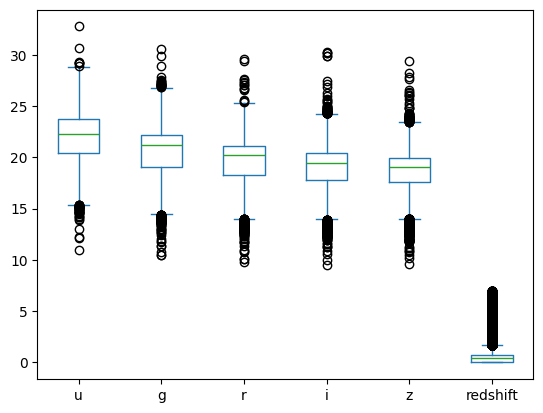

In [8]:
#Descripción variables numéricas
data.plot(kind='box')

<Axes: xlabel='class'>

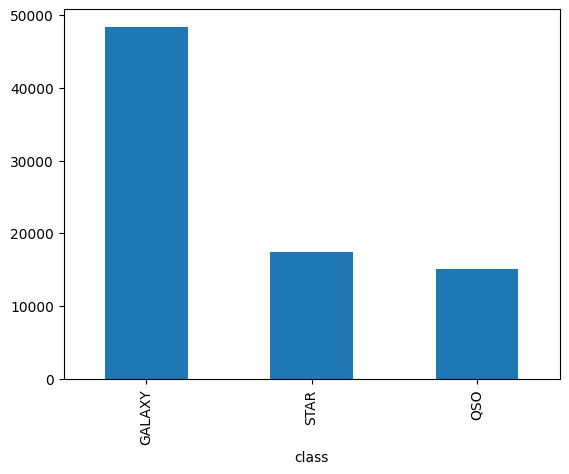

In [9]:
#Descripción variables categóricas
data['class'].value_counts().plot(kind='bar')

##Codificar variable objetivo

In [47]:
from sklearn.preprocessing import LabelEncoder
#Se codifican las categorias de la VARIABLE OBJETIVO

labelencoder = LabelEncoder()
data["class"]=labelencoder.fit_transform(data["class"]) #Objetivo

data.head()

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123


##Pipe

In [48]:
#Separar predictoras y objetivo
X = data.drop("class", axis = 1) # Variables predictoras
Y = data['class'] #Variable objetivo

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80846 entries, 0 to 80845
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   u         80846 non-null  float64 
 1   g         80846 non-null  float64 
 2   r         80846 non-null  float64 
 3   i         80846 non-null  float64 
 4   z         80846 non-null  float64 
 5   class     80846 non-null  category
 6   redshift  80846 non-null  float64 
dtypes: category(1), float64(6)
memory usage: 3.8 MB


In [13]:
# Definir las columnas categóricas y numéricas
numeric_cols = ['u', 'g', 'r', 'i', 'z', 'redshift']
categorical_cols = ['class']

In [11]:
#Paso 1: Limpiar atípicos
def remove_outliers(X):
    #Se asigna valor nulo a los atípicos

    X.loc[(X["u"] < 0), "u"] = np.nan
    X.loc[(X["g"] < 0), "g"] = np.nan
    X.loc[(X["r"] < 0), "r"] = np.nan
    X.loc[(X["i"] < 0), "i"] = np.nan
    X.loc[(X["z"] < 0), "z"] = np.nan


    #Validar todas las variables

    return X

In [28]:
# Paso 2: Imputar y transformaciones

# Para variables numéricas: Imputar por media y normalizar
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', MinMaxScaler())
])

# # Para variables categóricas: imputar por moda y crear dummies
# cat_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     #('dummies', OneHotEncoder(drop='if_binary',handle_unknown='ignore', sparse_output=False))
# ])

# Unir los dos pasos anteriores numéricos y categoricos
missing_transformations = ColumnTransformer(transformers=[
    ('num', num_transformer, numeric_cols),
    #('cat', cat_transformer, categorical_cols)
])

In [37]:
# Definir el pipeline completo

pipe = Pipeline(steps=[
    ('outliers', FunctionTransformer(remove_outliers)),
    ('preprocessor', missing_transformations)
])

pipe

Pipeline(steps=[('outliers',
                 FunctionTransformer(func=<function remove_outliers at 0x7d2ce83c4b80>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['u', 'g', 'r', 'i', 'z',
                                                   'redshift'])]))])

In [49]:
#Aplicar el pipe a los datos
X_processed = pipe.fit_transform(X)
X_processed

array([[23.87882  , 22.2753   , 20.39501  , 19.16573  , 18.79371  ,
         0.6347936],
       [24.77759  , 22.83188  , 22.58444  , 21.16812  , 21.61427  ,
         0.779136 ],
       [25.26307  , 22.66389  , 20.60976  , 19.34857  , 18.94827  ,
         0.6441945],
       ...,
       [21.16916  , 19.26997  , 18.20428  , 17.69034  , 17.35221  ,
         0.1433656],
       [25.35039  , 21.63757  , 19.91386  , 19.07254  , 18.62482  ,
         0.4550396],
       [22.62171  , 21.79745  , 20.60115  , 20.00959  , 19.28075  ,
         0.5429442]])

# 2. División 70-30


<Axes: xlabel='class'>

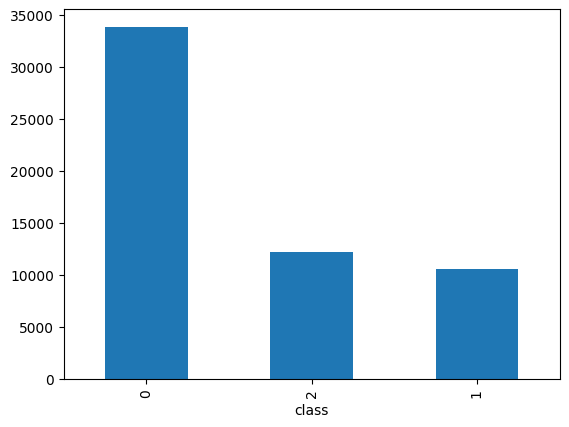

In [50]:
#División 70-30
from sklearn.model_selection import train_test_split

# Se pone estratificado en Clasificación
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.3, random_state=42, stratify=Y)
Y_train.value_counts().plot(kind='bar')

##Creación del modelo y evaluación
- Se utilizan los hiperparámetros hallados con los algoritmos genéticos

In [51]:
#Arbol
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=19, max_depth=63)

model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=63, min_samples_leaf=19)

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     14502
         QSO       0.95      0.93      0.94      4532
        STAR       0.99      1.00      1.00      5220

    accuracy                           0.98     24254
   macro avg       0.97      0.97      0.97     24254
weighted avg       0.98      0.98      0.98     24254



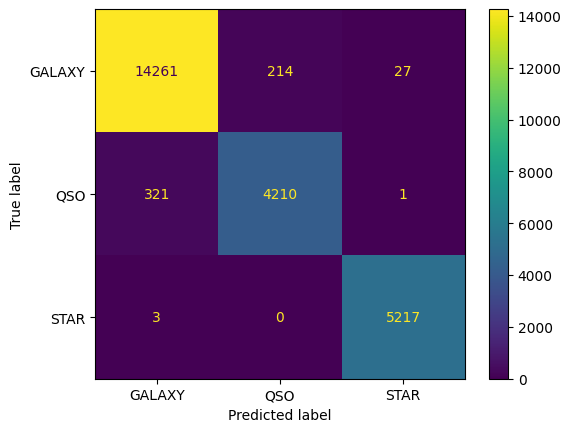

In [52]:
#Evaluación del Arbol
from sklearn import metrics

Y_pred = model_tree.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

##Pipe con modelo

In [53]:
# Reentrenar el modelo con todos los datos
model_tree.fit(X_processed, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=63, min_samples_leaf=19)

In [54]:
# Crea el pipeline con el escalado, codificación y modelo

from sklearn.pipeline import Pipeline

pipeline_model = Pipeline([
    ('preprocessor', pipe),  # Aplica el preprocesamiento
    ('model', model_tree)  # Modelo de red neuronal
])
pipeline_model

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('outliers',
                                  FunctionTransformer(func=<function remove_outliers at 0x7d2ce83c4b80>)),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer())]),
                                                                   ['u', 'g',
                                                                    'r', 'i',
                                                                    'z',
                                                                    'redshift'])]))])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=63,
                                        min_samples_leaf=19))])

# **5. Guardamos el modelo**

In [55]:
#Se guarda el pipeline
import pickle
filename = 'pipeline_modelo.pkl'
pickle.dump(pipeline_model, open(filename, 'wb'))